# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

### The objective is to analyze the provided dataset of 426,000 used cars to identify which features most strongly influence the vehicle's price. 
### This involves performing univariate and bivariate analyses by comparing the target variable (price) with individual predictor variables (i.e., mileage, year, brand, fuel type). 
### I will generate graphical summaries (i.e., boxplots, histograms, scatter plots) and numerical summaries (i.e., means, medians, correlations) to understand the distribution and relationships between price and other variables. 
### The goal is to uncover patterns and trends that can inform pricing strategies and highlight what car attributes consumers value most in the used car market.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Cleaning and Exploratory Data Analysis
### After refining the business understanding, we proceed with constructing a clean and reliable dataset suitable for modeling. 
### During the data cleaning phase, we address several integrity issues: we identify and handle missing values through appropriate imputation strategies, remove any duplicate records that may bias our results, and detect and address outliers that could distort model training. We also correct incorrect data types to ensure compatibility with modeling tools and fix or remove invalid entries (i.e., impossible mileage or negative prices).
### Following cleaning, we conduct exploratory data analysis (EDA) to better understand the dataset. 
### We begin with univariate analysis, examining the distribution of price and other individual features such as mileage, year, and brand. This is followed by bivariate analysis, where we explore how price relates to other variables using both graphical summaries (i.e., boxplots, scatter plots, and histograms) and numerical summaries (i.e., means, medians, and correlation coefficients). 
### These steps help us uncover meaningful patterns and relationships in the data, which guide feature engineering and transformation steps—such as scaling, normalization, or applying logarithmic transformations—in preparation for modeling with tools like scikit-learn.
### We will look primarily at the top factors that affect car price: cylinders, age, model, manufacturer, odometer, title_status and condition

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

pd.set_option('display.float_format', '{:,.0f}'.format)

In [4]:
df = pd.read_csv("vehicles.csv")

In [5]:
df.shape

(426880, 18)

In [6]:
df.sample(15)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
262832,7315052473,santa fe / taos,39990,"2,019",nissan,370z nismo coupe 2d,good,6 cylinders,gas,"8,373",clean,other,JN1AZ4EH8KM420880,rwd,NaN,coupe,white,nm
416403,7313504885,eau claire,24988,"2,018",chevrolet,equinox,like new,4 cylinders,gas,"14,925",clean,automatic,2GNAXSEV0J6238043,4wd,mid-size,SUV,grey,wi
148387,7313494128,"st louis, MO",7500,"2,011",bmw,3 series 328i,excellent,6 cylinders,gas,"97,000",clean,automatic,WBAPH7C50BA802324,rwd,full-size,sedan,white,il
367907,7309944749,corpus christi,5950,"2,006",toyota,camry,excellent,4 cylinders,gas,"158,311",clean,automatic,NaN,fwd,NaN,sedan,grey,tx
142945,7307932649,decatur,19988,"2,004",chevrolet,corvette,NaN,NaN,gas,"57,344",clean,automatic,1G1YY32G245110055,NaN,NaN,other,silver,il
386524,7311702912,st george,25550,"2,019",nissan,frontier 4x4,NaN,6 cylinders,gas,39,rebuilt,automatic,NaN,4wd,NaN,truck,white,ut
358226,7304730536,memphis,14894,"2,019",volkswagen,golf sportwagen,NaN,4 cylinders,gas,"42,253",clean,automatic,NaN,fwd,compact,wagon,grey,tn
272780,7314572760,long island,9990,"2,011",ford,econoline commercial cutaway,excellent,NaN,gas,"279,131",clean,automatic,1FDEE3FLXADA86949,rwd,NaN,NaN,NaN,ny
57987,7310383083,san luis obispo,9995,"2,009",bmw,3 series,excellent,NaN,gas,"77,588",clean,automatic,WBAPH53509A435908,rwd,NaN,NaN,silver,ca
254322,7314470583,north jersey,34995,"2,017",infiniti,qx80,NaN,NaN,gas,"69,060",clean,automatic,JN8AZ2NC5H9430711,NaN,NaN,NaN,NaN,nj


In [11]:
df.columns

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

In [13]:
# Drop all unused columns
Columns_to_drop = ['id', 'region', 'fuel', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state']

# Drop the columns
df = df.drop(columns=Columns_to_drop)

In [15]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'odometer', 'title_status'],
      dtype='object')

In [17]:
df["cylinders"].value_counts()

cylinders
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: count, dtype: int64

In [19]:
df["cylinders"].value_counts(normalize = True)

cylinders
6 cylinders    0
4 cylinders    0
8 cylinders    0
5 cylinders    0
10 cylinders   0
other          0
3 cylinders    0
12 cylinders   0
Name: proportion, dtype: float64

In [21]:
# Checking for missing values for columns of interest
df["cylinders"].isna().sum()

177678

In [23]:
df["year"].isna().sum()

1205

In [25]:
df["model"].isna().sum()

5277

In [27]:
df["manufacturer"].isna().sum()

17646

In [29]:
df["odometer"].isna().sum()

4400

In [31]:
df["title_status"].isna().sum()

8242

In [33]:
df["condition"].isna().sum()

174104

In [35]:
df["price"].isna().sum()

0

In [37]:
# Create a subset of factors to consider in important columns
important_Cols = ['cylinders', 'year', 'model', 'manufacturer', 'odometer', 'title_status', 'condition']

# Drop all missing values 
df = df.dropna(subset=important_Cols)


In [39]:
# Check that missing values are gone
df["cylinders"].isna().sum()

0

In [41]:
df["title_status"].value_counts()

title_status
clean         157620
rebuilt         4539
salvage         2102
lien            1085
missing          305
parts only        79
Name: count, dtype: int64

In [43]:
df["condition"].value_counts()

condition
excellent    71161
good         70980
like new     17243
fair          5071
new            838
salvage        437
Name: count, dtype: int64

In [45]:
df["model"].value_counts()

model
f-150                 2318
silverado 1500        2143
1500                  1365
camry                 1301
wrangler              1191
                      ... 
f-250 flat bed           1
3500 cargo van ext       1
3 s sport                1
duramax 2500hd           1
gand wagoneer            1
Name: count, Length: 13877, dtype: int64

In [47]:
df["manufacturer"].value_counts()

manufacturer
ford               28253
chevrolet          24717
toyota             14740
honda               9261
nissan              8307
jeep                7941
gmc                 7614
ram                 6376
dodge               5775
bmw                 4663
mercedes-benz       4405
subaru              3695
hyundai             3661
lexus               3580
volkswagen          3363
chrysler            2896
kia                 2767
audi                2731
cadillac            2535
acura               2491
infiniti            2481
buick               2292
mazda               1836
lincoln             1763
pontiac             1238
mitsubishi          1102
volvo               1074
mini                 756
mercury              700
rover                581
saturn               567
porsche              544
jaguar               540
fiat                 230
alfa-romeo            59
tesla                 59
harley-davidson       44
ferrari               38
datsun                37
aston-martin

In [49]:
df["odometer"].value_counts()

odometer
200,000    958
150,000    843
100,000    833
160,000    722
140,000    716
          ... 
175,511      1
40,499       1
186,908      1
115,698      1
69,550       1
Name: count, Length: 48452, dtype: int64

In [51]:
bins = [0, 10000, 30000, 60000, 100000, 150000, 200000, float('inf')]
labels = [
    "0 - 10,000",
    "10,001 - 30,000",
    "30,001 - 60,000",
    "60,001 - 100,000",
    "100,001 - 150,000",
    "150,001 - 200,000",
    "200,001+"
]

# Bin the odometer values
df["odometer_range"] = pd.cut(df["odometer"], bins=bins, labels=labels, right=True, include_lowest=True)

# Get the counts in each range
odometer_counts = df["odometer_range"].value_counts().sort_index()

print(odometer_counts)


odometer_range
0 - 10,000            8199
10,001 - 30,000      17161
30,001 - 60,000      23997
60,001 - 100,000     35064
100,001 - 150,000    44247
150,001 - 200,000    25397
200,001+             11665
Name: count, dtype: int64


In [53]:
df["condition"].value_counts()

condition
excellent    71161
good         70980
like new     17243
fair          5071
new            838
salvage        437
Name: count, dtype: int64

In [55]:
df["year"].value_counts()

year
2,013    12008
2,017    11472
2,014    11056
2,015    10440
2,016    10092
         ...  
1,918        1
1,915        1
1,900        1
1,922        1
1,945        1
Name: count, Length: 105, dtype: int64

In [57]:
# convert year to age with 2024 being the current year and adding the column into df
df["age"] = 2024 - df["year"]
df["age"].value_counts().sort_index()

age
2        10
3       455
4      4755
5      7260
6      9573
       ... 
106       1
109       1
111       2
119       1
124       1
Name: count, Length: 105, dtype: int64

In [59]:
# Drop cars older than 60 years for the regression to prevent vintage car outliers
df = df[df["age"] <= 60]
df["age"].value_counts().sort_index()

age
2        10
3       455
4      4755
5      7260
6      9573
7     11472
8     10092
9     10440
10    11056
11    12008
12    10086
13     9161
14     7244
15     5849
16     8176
17     7198
18     6444
19     5368
20     4640
21     3923
22     3071
23     2418
24     1964
25     1716
26     1105
27      994
28      737
29      651
30      595
31      425
32      342
33      369
34      361
35      335
36      281
37      262
38      269
39      246
40      197
41      141
42      125
43      123
44      138
45      200
46      191
47      143
48      102
49       96
50      121
51      191
52      169
53      167
54      131
55      179
56      208
57      135
58      181
59      161
60      127
Name: count, dtype: int64

In [61]:
# Drop rows where 'cylinders' is 'other'
df = df[df["cylinders"] != "other"]

# Convert text like '6 cylinders' to numeric values 
df["cylinders"] = df["cylinders"].str.extract(r"(\d+)").astype(int)


In [63]:
# Determine the percentiles of the price to determine where to cut off the data
df["price"].describe([0.0, 0.05, 0.1, 0.80, 0.85, 0.90, 0.95, 0.97, 0.99]).round(2)

count         164,117
mean           71,001
std        13,341,680
min                 0
0%                  0
5%                500
10%             2,800
50%            11,500
80%            27,990
85%            31,900
90%            35,900
95%            39,995
97%            44,995
99%            57,000
max     3,736,928,711
Name: price, dtype: float64

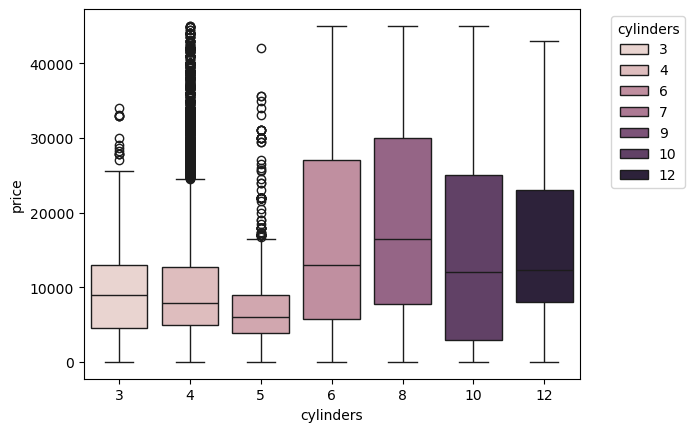

In [65]:
# Creating box and whisker plot for cylinders vs. price at 97% ($44,995)
sns.boxplot(data = df.query("price < 44995"), x = "cylinders", y = "price", hue = "cylinders")

# Move the legend outside the plot
plt.legend(title="cylinders", bbox_to_anchor=(1.05, 1), loc='upper left')

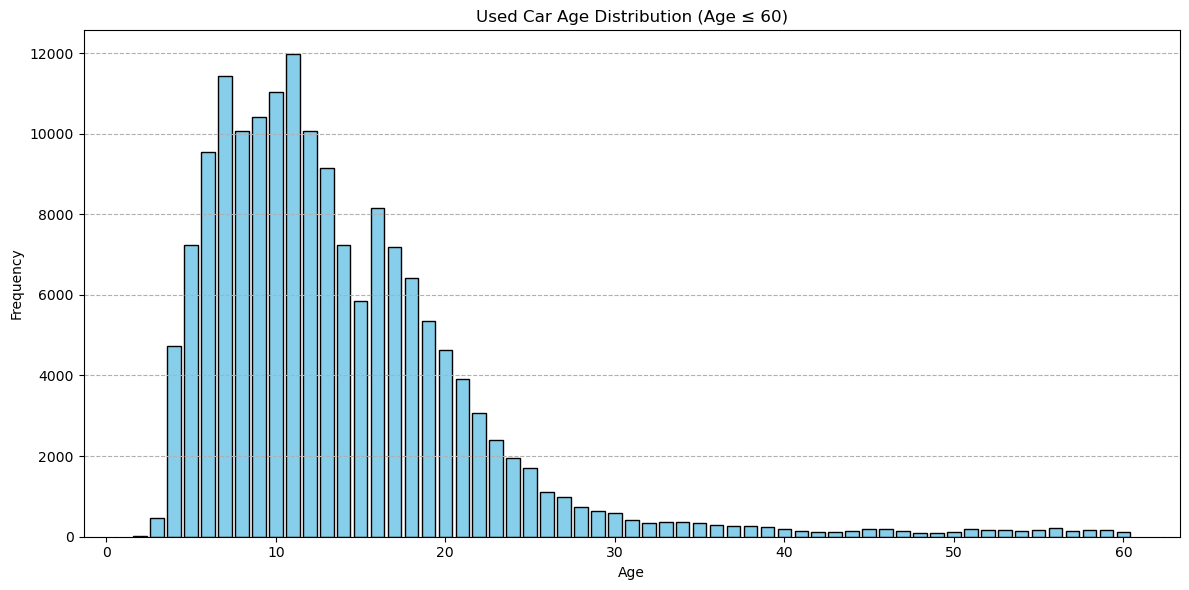

In [67]:
# Plotting histogram of age of vehicles
age_counts = df["age"].value_counts().sort_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(age_counts.index, age_counts.values, color='skyblue', edgecolor='black')
plt.title("Used Car Age Distribution (Age ≤ 60)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

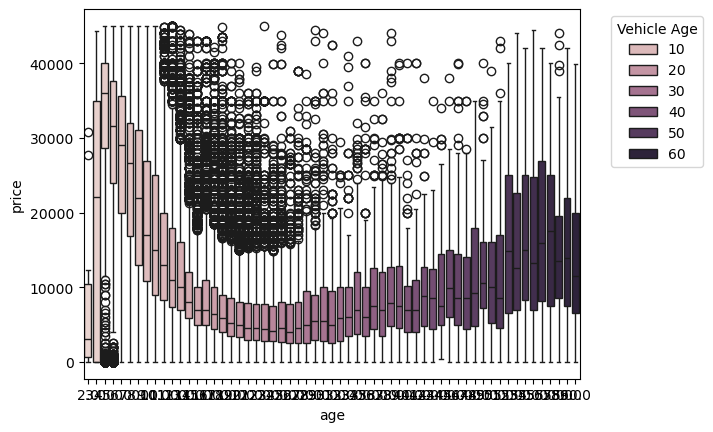

In [69]:
# Plotting age vs. price
sns.boxplot(data = df.query("price < 44995"), x = "age", y = "price", hue = "age")
# Move the legend outside the plot
plt.legend(title="Vehicle Age", bbox_to_anchor=(1.05, 1), loc='upper left')

In [70]:
# Since the above doesn't give too much information, creating Age bins
# Define bin edges and labels
bins = [0, 10, 20, 30, 40, 50, 60]
labels = ["0-10", "11-20", "21-30", "31-40", "41-50", "51-60"]

# Create a new column for age group
df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels, right=True, include_lowest=True)



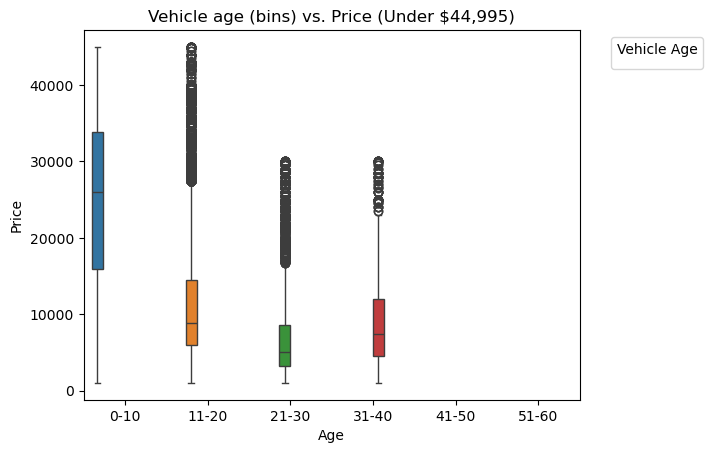

In [264]:
# Plotting age bin vs. price (97%)
sns.boxplot(data = df.query("price < 44995"), x = "age_group", y = "price", hue = "age_group")

# Move the legend outside the plot
plt.legend(title="Vehicle Age", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Vehicle age (bins) vs. Price (Under $44,995)")
plt.xlabel("Age")
plt.ylabel("Price")
plt.show()

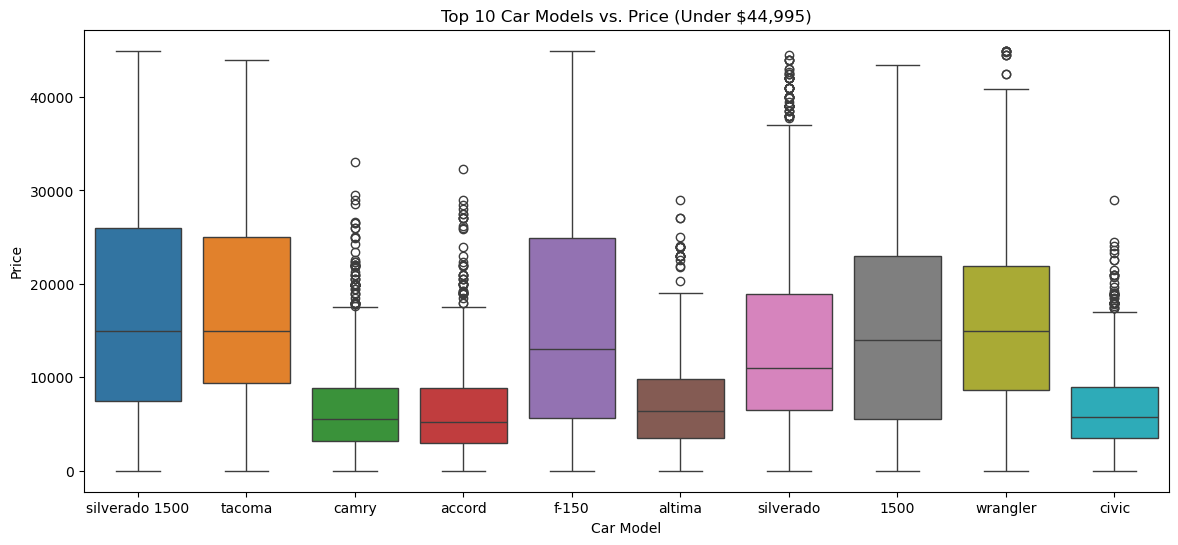

In [75]:
# Plotting box plot for the top 10 models versus price for the 97th percentile
plt.figure(figsize=(14, 6))
top_ten = df["model"].value_counts()[:10].index.tolist()
sns.boxplot(data = df.query("model == @top_ten").query("price < 44995"), x = "model", y = "price", hue = "model")

plt.title("Top 10 Car Models vs. Price (Under $44,995)")
plt.xlabel("Car Model")
plt.ylabel("Price")
plt.show()

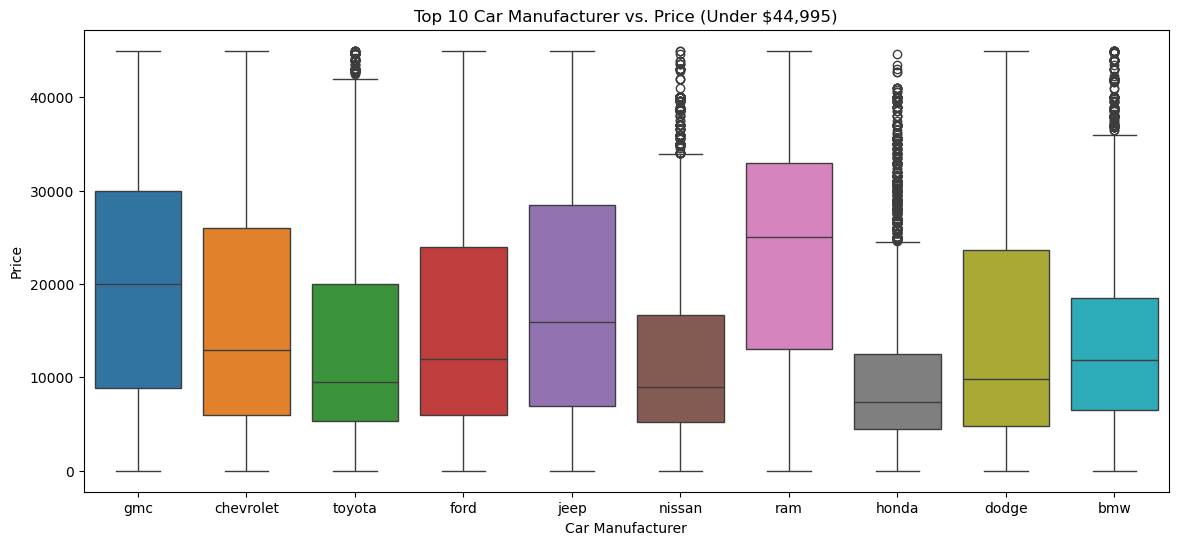

In [77]:
# Plotting box plot for the top 10 manufacturers versus price for the 97th percentile
plt.figure(figsize=(14, 6))
top_ten = df["manufacturer"].value_counts()[:10].index.tolist()
sns.boxplot(data = df.query("manufacturer == @top_ten").query("price < 44995"), x = "manufacturer", y = "price", hue = "manufacturer")

plt.title("Top 10 Car Manufacturer vs. Price (Under $44,995)")
plt.xlabel("Car Manufacturer")
plt.ylabel("Price")
plt.show()

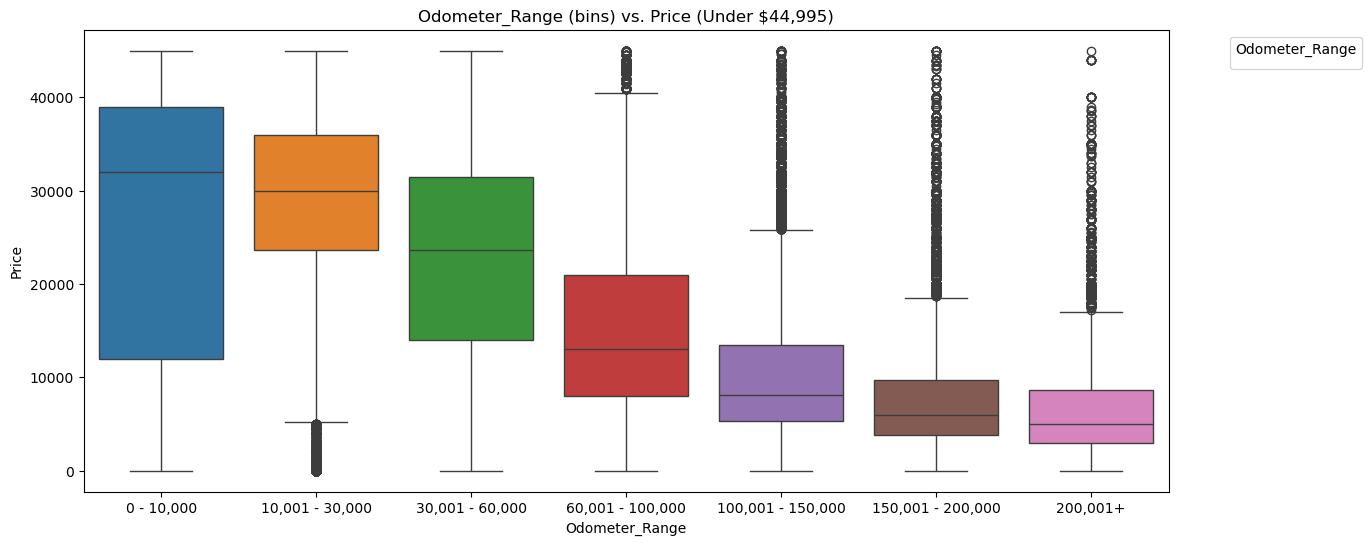

In [79]:
# Plotting odometer range vs. price (97%)
plt.figure(figsize=(14, 6))
sns.boxplot(data = df.query("price < 44995"), x = "odometer_range", y = "price", hue = "odometer_range")

# Move the legend outside the plot

plt.legend(title="Odometer_Range", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Odometer_Range (bins) vs. Price (Under $44,995)")
plt.xlabel("Odometer_Range")
plt.ylabel("Price")
plt.show()

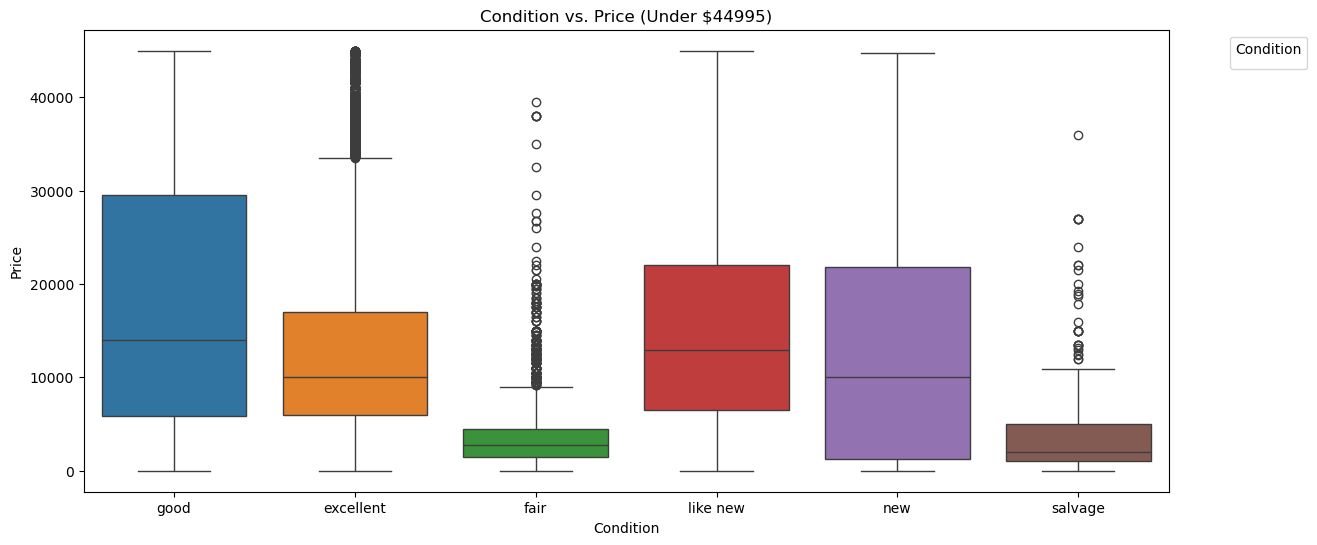

In [81]:
# Plotting condition vs. price (97%)
plt.figure(figsize=(14, 6))
sns.boxplot(data = df.query("price < 44995"), x = "condition", y = "price", hue = "condition")

# Move the legend outside the plot
plt.legend(title="Condition", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Condition vs. Price (Under $44995)")
plt.xlabel("Condition")
plt.ylabel("Price")
plt.show()

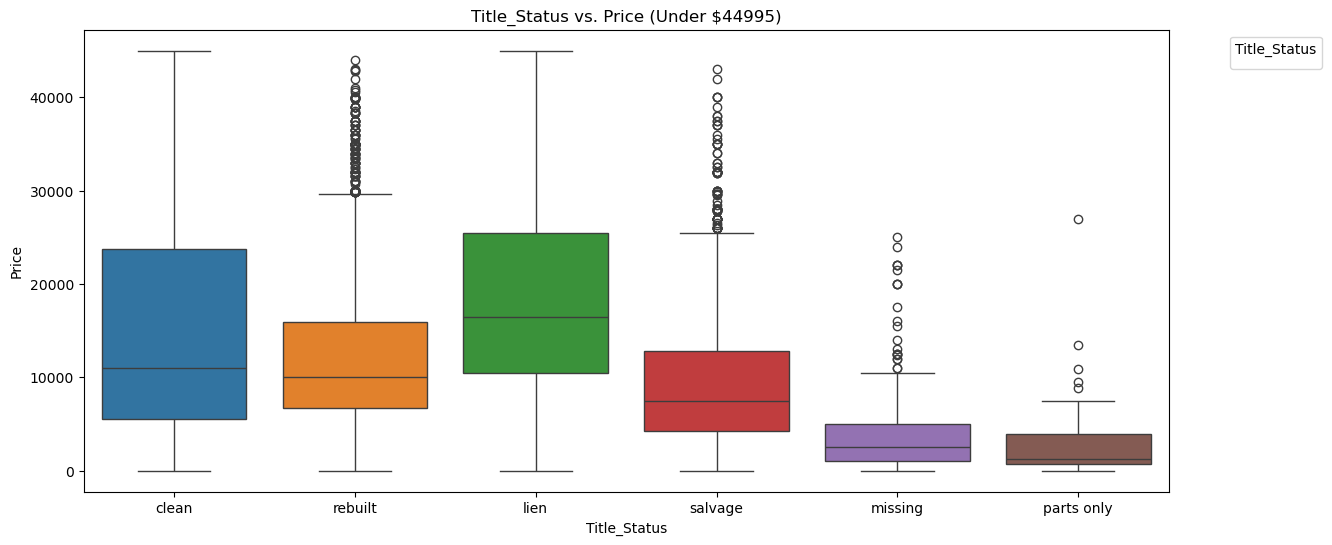

In [83]:
# Plotting odometer range vs. price (97%)
plt.figure(figsize=(14, 6))
sns.boxplot(data = df.query("price < 44995"), x = "title_status", y = "price", hue = "title_status")

# Move the legend outside the plot
plt.legend(title="Title_Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Title_Status vs. Price (Under $44995)")
plt.xlabel("Title_Status")
plt.ylabel("Price")
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [86]:
df.shape

(164117, 11)

In [88]:
df.sample(15)

,price,year,manufacturer,model,condition,cylinders,odometer,title_status,odometer_range,age,age_group
315627,10995,"2,011",audi,a6,excellent,6,"100,892",clean,"100,001 - 150,000",13,11-20
319054,46500,"2,015",ford,f-150 super crew platinum,like new,6,"42,000",clean,"30,001 - 60,000",9,0-10
270914,3900,"2,006",honda,pilot,like new,6,"240,054",clean,"200,001+",18,11-20
304569,0,"2,008",infiniti,m35,excellent,6,"135,536",clean,"100,001 - 150,000",16,11-20
299575,25990,"2,020",chevrolet,camaro lt coupe 2d,good,6,"21,938",clean,"10,001 - 30,000",4,0-10
100155,40990,"2,019",chevrolet,camaro ss coupe 2d,good,8,"14,139",clean,"10,001 - 30,000",5,0-10
267020,20499,"2,012",ford,f-150 4x4 supercab,excellent,8,"70,496",clean,"60,001 - 100,000",12,11-20
63345,11800,"2,010",infiniti,fx35,excellent,6,"125,690",clean,"100,001 - 150,000",14,11-20
253479,12000,"2,011",jeep,grand cherokee,good,8,"135,000",clean,"100,001 - 150,000",13,11-20
418604,3999,"2,008",subaru,forester,like new,4,"143,640",clean,"100,001 - 150,000",16,11-20


In [90]:
df['price'].min()

0

In [92]:
df['price'].max()

3736928711

In [94]:
# Filter the DataFrame for price under 55,000 (99th percentile)
df = df[df["price"] <= 55000]

In [96]:
df['price'].max()

55000

In [98]:
# Drop rows where 'price' is NaN or 0
df = df[df['price'].notna() & (df['price'] != 0)]

In [100]:
df['price'].min()

1

In [102]:
df = df[df["price"] >= 1000]

In [104]:
# Checking the percentiles of the price to determine where to cut off the data
df["price"].describe([0.0, 0.05, 0.1, 0.80, 0.85, 0.90, 0.95, 0.97, 0.99]).round(2)

count   153,243
mean     16,354
std      12,208
min       1,000
0%        1,000
5%        2,800
10%       3,900
50%      12,000
80%      27,995
85%      31,590
90%      35,590
95%      39,748
97%      42,590
99%      48,900
max      55,000
Name: price, dtype: float64

In [106]:
# Building simple linear regression for all the numerical features (cylinders, odometer, age) 
# Building a simple linear regression using price and cylinders 
X = df[['cylinders']]
y = df['price']

linreg = LinearRegression().fit(X, y)

In [108]:
slope = round(float(linreg.coef_), 2)
intercept = round(float(linreg.intercept_), 2)

print(type(slope))
print(slope, intercept)

<class 'float'>
2761.72 -191.3


In [110]:
df['prediction_cylinders'] = linreg.predict(X)
prediction = df[['prediction_cylinders']]

In [112]:
cylinders_mse = mean_squared_error(y, prediction)
cylinders_rmse = np.sqrt(cylinders_mse)

print(cylinders_mse)
print(cylinders_rmse)

130223660.50221105
11411.558197819046


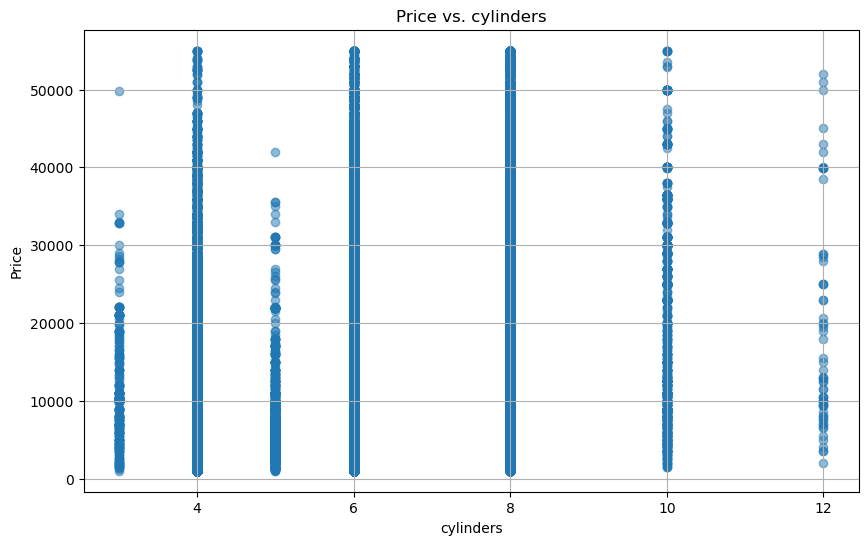

In [114]:
# Scatter plot price and cylinders
plt.figure(figsize=(10, 6))
plt.scatter(df['cylinders'], df['price'], alpha=0.5)
plt.xlabel('cylinders')
plt.ylabel('Price')
plt.title('Price vs. cylinders')
plt.grid(True)
plt.show()

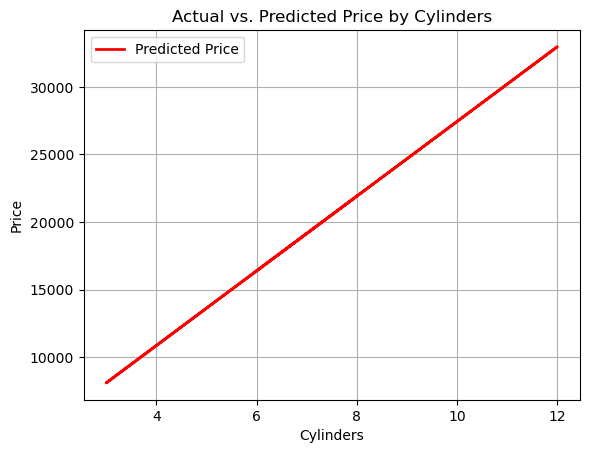

In [116]:
# Add predicted prices from your regression model
plt.plot(df['cylinders'], df['prediction_cylinders'], color='red', label='Predicted Price', linewidth=2)

# Final touches
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price by Cylinders')
plt.legend()
plt.grid(True)
plt.show()

# Just looking at the scatter plot from price and cylinders, we know that a linear regression model will not work.  The data is not linear at all! 

In [119]:
# Building a simple linear regression using price and odometer 
X = df[['odometer']]
y = df['price']

linreg = LinearRegression().fit(X, y)

In [121]:
slope = round(float(linreg.coef_), 2)
intercept = round(float(linreg.intercept_), 2)

print(type(slope))
print(slope, intercept)

<class 'float'>
-0.02 17987.9


In [123]:
df['prediction_odometer'] = linreg.predict(X)
prediction = df[['prediction_odometer']]

In [125]:
odometer_mse = mean_squared_error(y, prediction)
odometer_rmse = np.sqrt(cylinders_mse)

print(odometer_mse)
print(odometer_rmse)

141151569.33751118
11411.558197819046


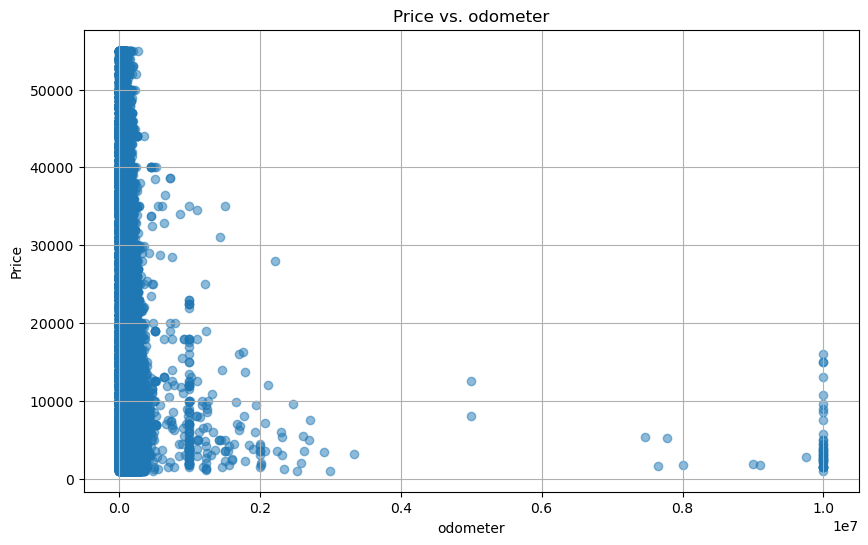

In [127]:
# Scatter plot price and odometer
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['price'], alpha=0.5)
plt.xlabel('odometer')
plt.ylabel('Price')
plt.title('Price vs. odometer')
plt.grid(True)
plt.show()

In [129]:
df = df[df['odometer'] < 200000]
df = df[df['odometer'] > 10]


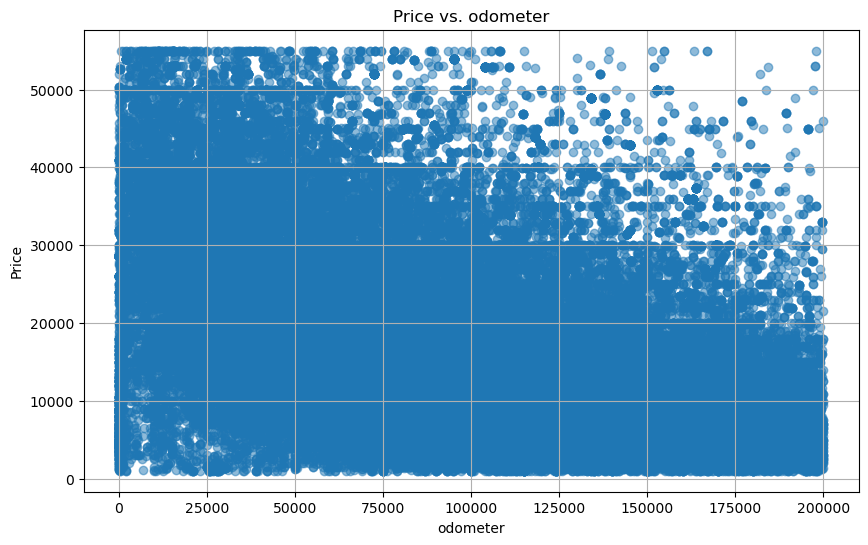

In [131]:
# Scatter plot price and odometer
plt.figure(figsize=(10, 6))
plt.scatter(df['odometer'], df['price'], alpha=0.5)
plt.xlabel('odometer')
plt.ylabel('Price')
plt.title('Price vs. odometer')
plt.grid(True)
plt.show()

In [133]:
# Re-run a simple linear regression using price and odometer 
X = df[['odometer']]
y = df['price']

linreg = LinearRegression().fit(X, y)
slope = round(float(linreg.coef_), 2)
intercept = round(float(linreg.intercept_), 2)

print(type(slope))
print(slope, intercept)

df['prediction_odometer'] = linreg.predict(X)
prediction = df[['prediction_odometer']]

odometer_mse = mean_squared_error(y, prediction)
odometer_rmse = np.sqrt(cylinders_mse)

print(odometer_mse)
print(odometer_rmse)

<class 'float'>
-0.15 30845.0
90849321.14137195
11411.558197819046


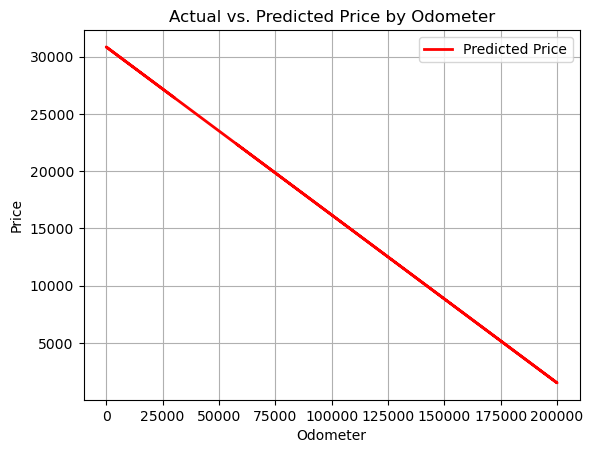

In [135]:
# Add predicted prices from your regression model
plt.plot(df['odometer'], df['prediction_odometer'], color='red', label='Predicted Price', linewidth=2)

# Final touches
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price by Odometer')
plt.legend()
plt.grid(True)
plt.show()

# Even after filtering the odometer data a scatter plotting for 100,000 miles, there is no way to fit a linear regression on that data

In [138]:
# Build a simple linear regression using price and age 
X = df[['age']]
y = df['price']

linreg = LinearRegression().fit(X, y)
slope = round(float(linreg.coef_), 2)
intercept = round(float(linreg.intercept_), 2)

print(type(slope))
print(slope, intercept)

df['prediction_age'] = linreg.predict(X)
prediction = df[['prediction_age']]

age_mse = mean_squared_error(y, prediction)
age_rmse = np.sqrt(cylinders_mse)

print(age_mse)
print(age_rmse)

<class 'float'>
-711.15 26722.82
117695239.2266279
11411.558197819046


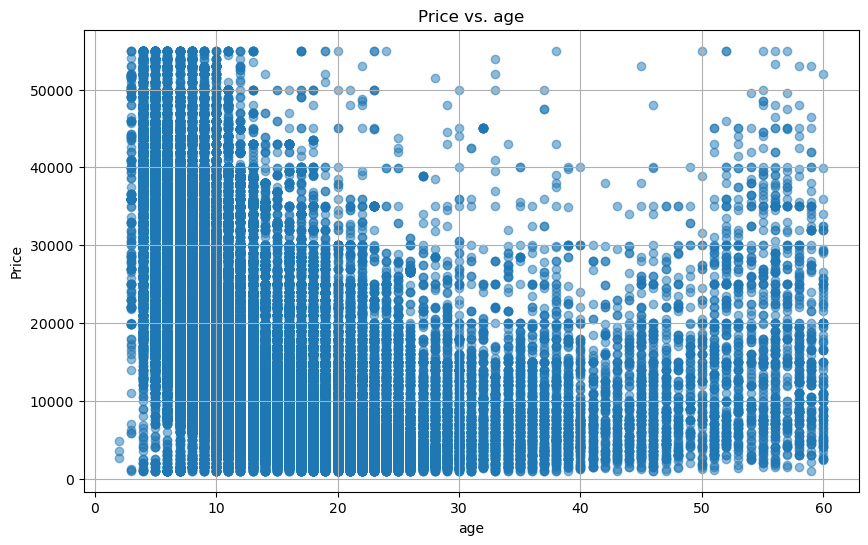

In [140]:
# Scatter plot price and age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price'], alpha=0.5)
plt.xlabel('age')
plt.ylabel('Price')
plt.title('Price vs. age')
plt.grid(True)
plt.show()

In [142]:
# Based on the scatter plot, need to filter the data further. Limit to max 40 year old cars.  Remove all rows with car prices above $30000 for cars over 15 years
df = df[df['age'] <= 40]
df = df[~((df['age'] > 15) & (df['price'] > 30000))]


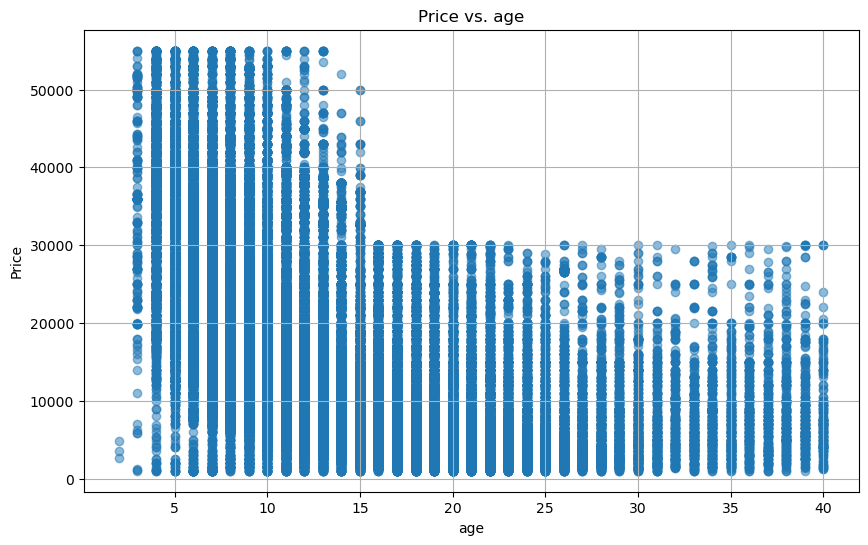

In [144]:
# Scatter plot price and age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price'], alpha=0.5)
plt.xlabel('age')
plt.ylabel('Price')
plt.title('Price vs. age')
plt.grid(True)
plt.show()

In [146]:
# Re-run a simple linear regression using price and age 
X = df[['age']]
y = df['price']

linreg = LinearRegression().fit(X, y)
slope = round(float(linreg.coef_), 2)
intercept = round(float(linreg.intercept_), 2)

print(type(slope))
print(slope, intercept)

df['prediction_age'] = linreg.predict(X)
prediction = df[['prediction_age']]

age_mse = mean_squared_error(y, prediction)
age_rmse = np.sqrt(age_mse)

print(age_mse)
print(age_rmse)

<class 'float'>
-1198.51 32373.36
94785339.07752278
9735.77624422022


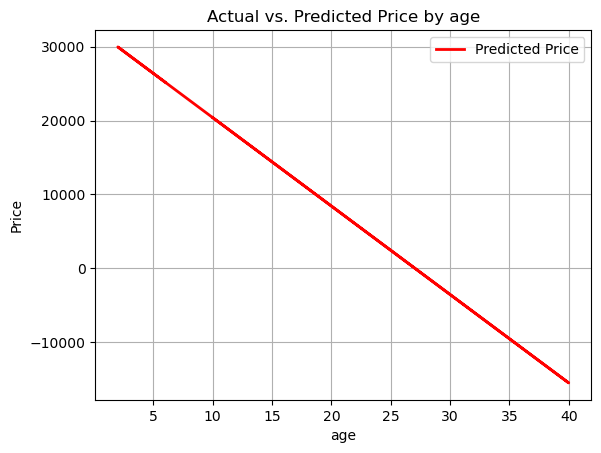

In [148]:
# Add predicted prices from your regression model
plt.plot(df['age'], df['prediction_age'], color='red', label='Predicted Price', linewidth=2)

# Final touches
plt.xlabel('age')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Price by age')
plt.legend()
plt.grid(True)
plt.show()

# The RMSE is still very large. Perhaps, a log of price could help. 

In [176]:
# I am going to look at one item to see if creating the log of price will make the graphs look more linear.
df["price_log"] = np.log(df["price"])

In [178]:
# Re-run a simple linear regression using log of price and age 
X = df[['age']]
y = df['price_log']

linreg = LinearRegression().fit(X, y)
slope = round(float(linreg.coef_), 2)
intercept = round(float(linreg.intercept_), 2)

print(type(slope))
print(slope, intercept)

df['prediction_age_log'] = linreg.predict(X)
prediction = df[['prediction_age_log']]

age_log_mse = mean_squared_error(y, prediction)
age_log_rmse = np.sqrt(age_log_mse)

print(age_log_mse)
print(age_log_rmse)

<class 'float'>
-0.08 10.53
0.3978953556899481
0.6307894701799865


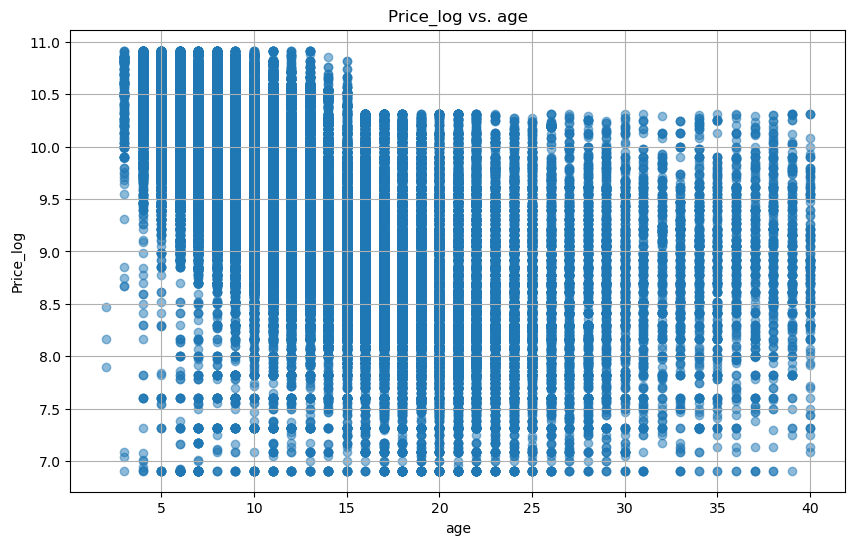

In [180]:
# Scatter plot price and age
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['price_log'], alpha=0.5)
plt.xlabel('age')
plt.ylabel('Price_log')
plt.title('Price_log vs. age')
plt.grid(True)
plt.show()

In [206]:
# drop target (price) + categorical from the df and assign it to X
X = df.drop(columns=['year', 'model', 'manufacturer', 'title_status', 'condition', 'price', 'age_group', 'odometer_range', 'prediction_cylinders', 'prediction_odometer', 'prediction_age', 'prediction_age_log', 'price_log']) 

# One-hot encode the categorical columns
categorical_cols = ['model', 'manufacturer', 'title_status', 'condition']
X_encoded = pd.get_dummies(df[categorical_cols], dtype=int)

# Reindex to ensure alignment
X_encoded = X_encoded.reindex(X.index)

# Append encoded columns
X = pd.concat([X, X_encoded], axis=1)
y = df[["price_log"]]

In [208]:
X.sample(15)


,cylinders,odometer,age,model_#NAME?,model_& altima,model_(cng) 2500 express van,model_(s)port (s)edan,model_* vmi * ♿,model_- 328i - convertible,model_-150 xlt,...,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage
210831,6,"145,000",7,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
143892,8,"147,100",19,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
265664,4,"66,286",11,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
377085,8,"24,588",5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
144133,4,"180,000",15,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
129313,8,"15,700",22,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
323491,6,"122,435",12,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
86216,6,"175,000",16,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
297785,4,"164,000",13,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
45030,6,"112,752",13,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


## Log of price vs Other numerical features shows a better linear relationship with lower MSE errors

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [210]:
# Train-test split 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.decomposition import PCA


# Building a Linear regression pipeline. My machine does not have enough RAM to handle the data during model fitting. 
# Specifically, the matrix being created is ~110,000 rows × ~11,490 columns, which is extremely large. Using PCA
scaled_pipe = Pipeline([
     ('scaler', StandardScaler()), 
    ('pca', PCA(n_components=100)), 
    ('regression', LinearRegression())
    ])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")



Train MSE: 0.22215343295568166
Test MSE: 0.2168855420688496
------
Train RMSE: 0.47
Test RMSE: 0.47


In [233]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Building a Pipeline for Ridge regression
scaled_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())  #using standard alpha = 1
    ])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train MSE: 0.08314456849462178
Test MSE: 0.10860095836211478
------
Train RMSE: 0.29
Test RMSE: 0.33


In [235]:
# Adding regularization to the RIDGE model 
# Building a Pipeline for Ridge regression
scaled_pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('ridge', Ridge(alpha = 0.5))
    ])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")


Train MSE: 0.08314454893567798
Test MSE: 0.10871220357714158
------
Train RMSE: 0.29
Test RMSE: 0.33


## The Ridge and linear regression models look pretty good with train and test RMSE less than 0.5.

In [241]:
from sklearn.linear_model import Lasso

# Building a Pipeline for Lasso regression
scaled_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso()) 
])

# Fit the pipeline
scaled_pipe.fit(X_train, y_train)

# Calculate MSE
train_preds = scaled_pipe.predict(X_train)
test_preds = scaled_pipe.predict(X_test)

# MSE
train_mse = mean_squared_error(y_train, train_preds)
test_mse = mean_squared_error(y_test, test_preds)

# RMSE
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# check
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')
print("------")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

Train MSE: 0.08314454893567798
Test MSE: 0.10871220357714158
------
Train RMSE: 0.29
Test RMSE: 0.33


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

## Using the log of price(y) and all the other features (as X), I am getting pretty good test and train RMSE values. The results showed that both the Ridge and Lasso models could be used to predict the car price. This can be done by using the coefficients from the model.

In [248]:
# Access coefficients for the Ridge model 
ridge_model = scaled_pipe.named_steps['ridge']
coefficients = ridge_model.coef_
print(ridge_model.coef_.shape)

(1, 11490)


In [250]:
# Flatten coef
coefficients = ridge_model.coef_.flatten()  
# Match with feature names
feature_names = X_train.columns
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [258]:
# Sort and print coefs
coef_df = coef_df.sort_values(by='Coefficient', ascending=True)
print(coef_df)
coef_df.head()
coef_df.sample(100)

                    Feature  Coefficient
2                       age           -0
1                  odometer           -0
11443      manufacturer_bmw           -0
11463    manufacturer_mazda           -0
11485        condition_fair           -0
...                     ...          ...
11457   manufacturer_jaguar            0
3157         model_corvette            0
11470  manufacturer_porsche            0
11468   manufacturer_nissan            0
11475   manufacturer_toyota            0

[11490 rows x 2 columns]


,Feature,Coefficient
10346,model_transit 250 med. roof,0
10103,model_tiburon se,0
8645,model_s4 3.0t premium plus,0
8047,model_q7 s-line prestige,0
260,model_200-series,-0
...,...,...
469,model_3-series 328i convertible,0
3964,model_el camino conquista,0
6106,model_hylander,-0
296,model_240sx se,0


## Since I used StandardScaler, the coefficients are based on standardized features, not raw ones. This means:
## They are still useful for ranking feature importance, but not directly interpretable in dollars for the price.
## In order to make them interpretable in dollars, I need to store the mean and std from StandardScaler and applying the inverse transformation to coefficients (beyond the scope here)
## I will also need to find the inverse log of the price, to make the price results interpretable than dollars. This conversion was made to make the data are linear.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

## Please see the detailed read me file that has all the details of a basic report to address the audience group of used car dealers to fine-tune their inventory.